## Final Exam

**Northeastern University Honor Code**\
On my honor, I pledge to uphold the values of honesty, integrity, and respect that are expected of me as a Northeastern student.

**Signature: (Please sign here)**

## Instructions

1. Do not rename the notebook. If you do, the local and Gradescope autograders will not work.
1. Name the variables exactly as requested. Python is case-sensitive, so `df` and `DF` are different variables.
1. After you answer a question, you may run its public tests.
1. ***The public tests ensure your answers are formatted correctly but do not ensure your answers are correct.***
1. Gradescope runs hidden tests in addition to the public tests but does not reveal public test results until after the due date. Your grade will be "~/100" until after the due date.

#### Import the Necessary Libraries

In [103]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize
from scipy import stats
import statsmodels.api as sm

In [104]:
asgnd_seed = 11281811

---

### PART 1

#### Please run the code in the cell below. You will be assigned two (out of four) indexes, whose tickers will be stored in a variable called index_list.

In [105]:
# Index Selection

# ^GSPC is the ticker for the S&P 500 index
# ^DJI is the ticker for the Dow Jones index
# ^IXIC is the ticker for the Nasdaq Composite index 
# ^RUT is the ticker for the Russell 2000 index 

np.random.seed(asgnd_seed)
indexes = ['^GSPC', '^DJI', '^IXIC', '^RUT']
index_list = sorted(np.random.choice(indexes,2,replace=False))
index_list

['^DJI', '^IXIC']

#### 1. Create a DataFrame named `index_mon` to store the monthly simple returns for the two indexes you were assigned. The sample period is January 1st, 2017 - October 31st, 2021. Label the columns as 'ticker', where ticker represents the trading symbol of the index whose returns are stored in that column. Drop any observations with missing values.

_Points:_ 5

In [106]:
import numpy as np
import pandas as pd
import yfinance as yf

# Replace 'index1' and 'index2' with the tickers assigned to you
index1 = '^DJI'
index2 = '^IXIC'
# Download historical price data
start_date = pd.to_datetime('2016-12-01')
end_date = pd.to_datetime('2021-10-31')
index1_data = yf.download(index1, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1), interval='1mo')
index2_data = yf.download(index2, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1), interval='1mo')

# Calculate monthly simple returns
index1_returns = index1_data['Adj Close'].pct_change().dropna()
index2_returns = index2_data['Adj Close'].pct_change().dropna()

# Create index_mon DataFrame
index_mon = pd.DataFrame({index1: index1_returns, index2: index2_returns})
index_mon = index_mon.dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [107]:
index_mon.shape

(58, 2)

In [108]:
grader.check("q01")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q01 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 2. Create a line plot of the cumulative return series for the two indexes in the `index_mon` DataFrame. Use "figsize", "grid", and "title" with the Pandas plot() method.

_Points:_ 5

<Axes: title={'center': 'Cumulative Returns of the Two Indexes'}, xlabel='Date'>

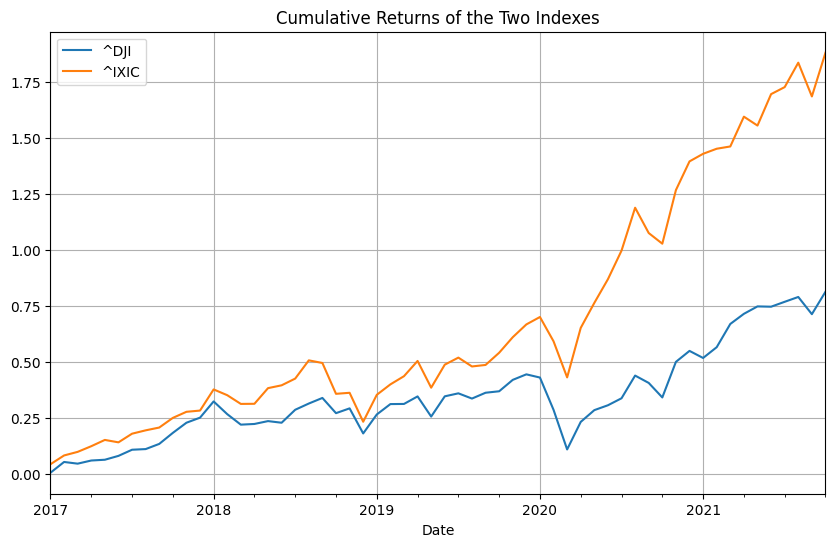

In [109]:
cumulative_returns = (1 + index_mon).cumprod() - 1
cumulative_returns.plot(figsize=(10, 6), grid=True, title='Cumulative Returns of the Two Indexes')


<!-- END QUESTION -->

---

#### 3. Create a new DataFrame named `ff_factors` to store the monthly Fama-French 4 factors over the sample period January 2017 - October 2021.

_Points:_ 5

In [110]:
start_date = '2017-01-01'
end_date = '2021-10-31'
ff_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start_date, end_date)[0]
mom_factor = web.DataReader('F-F_Momentum_Factor', 'famafrench', start_date, end_date)[0]
ff_factors = pd.merge(ff_factors, mom_factor, on='Date')
ff_factors = ff_factors / 100
ff_factors.index = ff_factors.index.to_timestamp()
ff_factors.head()

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2017-01-01,0.0194,-0.0114,-0.0276,0.0004,-0.0093
2017-02-01,0.0357,-0.0202,-0.0168,0.0004,-0.0165
2017-03-01,0.0017,0.0114,-0.0332,0.0003,-0.0102
2017-04-01,0.0109,0.0072,-0.0210,0.0005,0.0048
2017-05-01,0.0106,-0.0252,-0.0378,0.0006,0.0148


In [111]:
ff_factors.shape

(58, 5)

In [112]:
grader.check("q03")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q03 results: All test cases passed!

---

#### 4. Compute the Sharpe Ratio for both indexes over the entire sample period. Store the two values in two variables labeled index1_SR, and index2_SR, where index1 is the first index in index_list, while index2 is the second index in index_list.

_Points:_ 5

In [113]:
risk_free_rate = ff_factors['RF'].mean()
index1_SR = (index_mon[index1].mean() - risk_free_rate) / index_mon[index1].std()
index2_SR = (index_mon[index2].mean() - risk_free_rate) / index_mon[index2].std()


In [114]:
grader.check("q04")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q04 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 5. Run the Fama-French 4 factor model for both indexes over the entire sample period and print the output of the regression.

_Points:_ 5

In [115]:
import statsmodels.api as sm

# Merge index returns with Fama-French factors
index_ff = pd.merge(index_mon, ff_factors, left_index=True, right_index=True,how='outer')

# Calculate excess returns for both indexes
index_ff[f'{index1}_excess'] = index_ff[index1] - index_ff['RF']
index_ff[f'{index2}_excess'] = index_ff[index2] - index_ff['RF']

# Run Fama-French 4 factor model for both indexes
X = sm.add_constant(index_ff[['Mkt-RF', 'SMB', 'HML', 'Mom   ']])

index1_model = sm.OLS(index_ff[f'{index1}_excess'], X).fit()
index2_model = sm.OLS(index_ff[f'{index2}_excess'], X).fit()

# Print the output of the regression
print(f"Regression for {index1}:")
print(index1_model.summary())
print("\n")
print(f"Regression for {index2}:")
print(index2_model.summary())


Regression for ^DJI:
                            OLS Regression Results                            
Dep. Variable:            ^DJI_excess   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     233.7
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.65e-33
Time:                        12:31:32   Log-Likelihood:                 181.66
No. Observations:                  58   AIC:                            -353.3
Df Residuals:                      53   BIC:                            -343.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.00

<!-- END QUESTION -->

---

<!-- BEGIN QUESTION -->

#### 6. Did either of the indexes outperform or underperform? Briefly explain.

_Points:_ 5

For ^DJI, the alpha is -0.0018, which suggests that the ^DJI index slightly underperforms the market on average, given the other factors in the model. However, it's important to note that the underperformance is relatively small and the P value is large, indicating insiginificant result.

For ^IXIC, the alpha is 0.0008, which implies that the ^IXIC index slightly outperforms the market on average, given the other factors in the model. Again, the outperformance is relatively small and the P value is large, indicating insiginificant result.

In [116]:
...

Ellipsis

<!-- END QUESTION -->

---

<!-- BEGIN QUESTION -->

#### 7. Based on the coefficients for the SMB and HML factors, what inferences can you draw about the two indexes? Briefly explain.

_Points:_ 5

For ^DJI, the SMB coefficient is -0.2352, which is statistically significant (P>|t| = 0.000). This suggests that the ^DJI index has a tilt toward large-cap stocks.

For ^IXIC, the SMB coefficient is 0.0967, which is not statistically significant (P>|t| = 0.067). This suggests that the ^IXIC index does not have a clear tilt toward either small-cap or large-cap stocks.

The HML (High Minus Low) factor represents the return difference between value stocks (high book-to-market ratio) and growth stocks (low book-to-market ratio). A positive coefficient suggests that the index is tilted toward value stocks, while a negative coefficient suggests a tilt toward growth stocks.

For ^DJI, the HML coefficient is 0.1450, which is statistically significant (P>|t| = 0.003). This suggests that the ^DJI index has a tilt toward value stocks.

For ^IXIC, the HML coefficient is -0.2540, which is statistically significant (P>|t| = 0.000). This suggests that the ^IXIC index has a tilt toward growth stocks.

<!-- END QUESTION -->

---

### PART 2

#### Please run the code in the cell below. You will be assigned five stocks, whose tickers will be stored in a variable called stock_list.

In [117]:
np.random.seed(asgnd_seed)
all_tickers = ['AAPL', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'T', 'UNH', 'V', 'VZ', 'WMT', 'XOM']

stock_list = sorted(np.random.choice(all_tickers,5,replace=False))
stock_list

['CAT', 'CSCO', 'DIS', 'HD', 'WMT']

#### 8. Create a DataFrame called `returns_pt2` to store the monthly simple returns for the five stocks you were assigned. The sample period is January 1st, 2012 to December 31st, 2016. Each stock's return should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker. Drop any observations with missing values.

_Points:_ 5

In [118]:
tickers = ['CAT', 'CSCO', 'DIS', 'HD', 'WMT']
start_date = dt.datetime(2012, 1, 1)
end_date = dt.datetime(2016, 12, 31)

price_data = yf.download(tickers, start=start_date- pd.offsets.BDay(1), end=end_date+ pd.offsets.BDay(1))['Adj Close']

monthly_returns = price_data.resample('M').ffill().pct_change()
monthly_returns = monthly_returns.dropna()
monthly_returns.columns = ['ticker_' + ticker for ticker in tickers]

returns_pt2 = monthly_returns

print(returns_pt2)

[*********************100%***********************]  5 of 5 completed
            ticker_CAT  ticker_CSCO  ticker_DIS  ticker_HD  ticker_WMT
Date                                                                  
2012-01-31    0.209798     0.090455    0.037333   0.055899    0.026774
2012-02-29    0.046646     0.011705    0.079435   0.071637   -0.037158
2012-03-31   -0.067332     0.063883    0.042629   0.064112    0.042817
2012-04-30   -0.031124    -0.043196   -0.015304   0.029417   -0.037418
2012-05-31   -0.147417    -0.189980    0.060311  -0.041685    0.124879
2012-06-30   -0.030929     0.051439    0.061037   0.073977    0.059252
2012-07-31   -0.001908    -0.066706    0.013196  -0.015286    0.067556
2012-08-31    0.013300     0.196239    0.006716   0.093175   -0.019312
2012-09-30    0.008321     0.001048    0.056802   0.063789    0.016529
2012-10-31   -0.008343    -0.095443   -0.060444   0.016730    0.016531
2012-11-30    0.005070     0.110783    0.010993   0.064893   -0.039989
2012-12-

In [119]:
grader.check("q08")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q08 results: All test cases passed!

---

#### 9. Create a new DataFrame named `rf_rate` to store the monthly risk-free rate over the sample period January 1st, 2012 - December 31st, 2016.

_Points:_ 4.5

In [120]:
start_date = dt.datetime(2012, 1, 1)
end_date = dt.datetime(2016, 12, 31)

rf_rate = web.DataReader('F-F_Research_Data_Factors','famafrench', start_date, end_date)[0][['RF']].div(100)
rf_rate.index = rf_rate.index.to_timestamp(how='end').normalize()
rf_rate.head()

,RF
Date,
2012-01-31,0.0000
2012-02-29,0.0000
2012-03-31,0.0000
2012-04-30,0.0000
2012-05-31,0.0001


In [121]:
grader.check("q09")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q09 results: All test cases passed!

---

#### 10. Find the optimal portfolio that can be created using the five stocks you were assigned (assume there are short-selling constraints) over the sample period January 1st, 2012 - December 31st, 2016. Store the optimal weights in a DataFrame named `weights`, which should have two columns: 1) TICKER (set as the index); 2) OP_weights (to store the optimal weights). Thus, the DataFrame should have a (5,1) shape.

_Points:_ 5

In [122]:
def port_ret(weights):
    port_ret = np.dot(prices_mon*12,weights).mean()
    return port_ret

def port_std(weights):
    port_std = np.sqrt(np.dot(weights, np.dot(prices_mon.cov()*12, weights)))
    return port_std

def ex_port_ret(weights):
    ex_port_ret = (np.dot(prices_mon,weights) - rf['RF']).mean()*12
    return ex_port_ret

def ex_port_std(weights):
    ex_port_std = (np.dot(prices_mon,weights) - rf['RF']).std()*np.sqrt(12)
    return ex_port_std

def neg_SR(weights):
    SR = ex_port_ret(weights) / ex_port_std(weights)
    return (-1)*SR

start = dt.datetime(2012,1,1)
end = dt.datetime(2016,12,31)
prices = yf.download(list(stock_list),start-pd.offsets.BusinessDay(1),end+pd.offsets.BusinessDay(1))['Adj Close'].pct_change().dropna()
prices_mon = prices.resample(rule = 'M').apply(lambda x: x.add(1).prod().sub(1))

rf = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0][['RF']].div(100) #Get risk free rate
rf.index = rf.index.to_timestamp(how='end').normalize()
prices_mon = prices_mon[prices_mon.index<=rf.index[-1]]
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1})

boundaries=[(0,1)]
bounds = tuple(boundaries * len(prices_mon.columns))
init_guess = np.full(len(prices_mon.columns), 1/len(prices_mon.columns))
optimal_port = minimize(neg_SR,init_guess,bounds = bounds,
                        constraints=constraints)

weights = pd.DataFrame({'OP_weights':optimal_port.x}, index = returns_pt2.columns)

[*********************100%***********************]  5 of 5 completed


In [123]:
grader.check("q10")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q10 results: All test cases passed!

---

#### 11. Create an additional column in the DataFrame `weights` to store a set of random weights for the five stocks you were assigned. Label the column RD_weights. Use the assigned seed as the random seed when generating the random weights.

_Points:_ 5

In [124]:
np.random.seed(asgnd_seed)
random_weights = np.random.rand(len(stock_list))
random_weights /= np.sum(random_weights)
weights['RD_weights'] = random_weights


In [125]:
grader.check("q11")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q11 results: All test cases passed!

---

### PART 3

#### 12. Create a DataFrame called `prices` to store the **end of the month** Adjusted Closing Price from Yahoo!Finance for the five companies you were assigned above. The sample period is January 1st, 2017 to October 31st, 2021. Each stock's price should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 5

In [126]:
import pandas as pd
import datetime as dt

start_date = dt.datetime(2017, 1, 1)
end_date = dt.datetime(2021, 10, 31)

prices = yf.download(stock_list, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1), interval='1mo')['Adj Close']

prices.index = pd.to_datetime(prices.index).strftime('%Y-%m-%d').map(lambda x: pd.to_datetime(x) + pd.offsets.MonthEnd(0))


[*********************100%***********************]  5 of 5 completed


In [127]:
grader.check("q12")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q12 results:
    q12 - 1 result:
        ✅ Test case passed

    q12 - 2 result:
        ✅ Test case passed

    q12 - 3 result:
        ❌ Test case failed
        Trying:
            np.allclose(np.sort(prices.sum().values),np.sort(np.array([2326.25641251,6023.49720001,7462.45547485,7877.95854187,11898.8943634])))
        Expecting:
            True
        **********************************************************************
        Line 1, in q12 2
        Failed example:
            np.allclose(np.sort(prices.sum().values),np.sort(np.array([2326.25641251,6023.49720001,7462.45547485,7877.95854187,11898.8943634])))
        Expected:
            True
        Got:
            False

---

#### 13. Create a DataFrame named `investments` to store the **monthly** value of a $1 investment made on December 31st, 2016 in each of the five stocks. The investment in each stock should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 5

In [128]:
initial_investment = 1
investments = prices.apply(lambda x: initial_investment * x / x.iloc[0])

In [129]:
grader.check("q13")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q13 results:
    q13 - 1 result:
        ✅ Test case passed

    q13 - 2 result:
        ✅ Test case passed

    q13 - 3 result:
        ❌ Test case failed
        Trying:
            np.allclose(np.sort(investments.sum().values),np.sort(np.array([74.77171135,94.20542144,98.35957192,100.0358243,102.90633503])))
        Expecting:
            True
        **********************************************************************
        Line 1, in q13 2
        Failed example:
            np.allclose(np.sort(investments.sum().values),np.sort(np.array([74.77171135,94.20542144,98.35957192,100.0358243,102.90633503])))
        Expected:
            True
        Got:
            False

---

#### 14. Create a DataFrame called `returns` to store the monthly simple returns for the five stocks you were assigned. The sample period is January 1st, 2017 to October 31st, 2021. Each stock's price should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 5

In [130]:
returns = prices.pct_change()


In [131]:
grader.check("q14")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q14 results:
    q14 - 1 result:
        ✅ Test case passed

    q14 - 2 result:
        ✅ Test case passed

    q14 - 3 result:
        ❌ Test case failed
        Trying:
            np.allclose(np.sort(returns.sum().values),np.sort(np.array([0.70184885,0.91500946,0.95310957,1.08387012,1.25443217])))
        Expecting:
            True
        **********************************************************************
        Line 1, in q14 2
        Failed example:
            np.allclose(np.sort(returns.sum().values),np.sort(np.array([0.70184885,0.91500946,0.95310957,1.08387012,1.25443217])))
        Expected:
            True
        Got:
            False

---

#### 15. Which stock had the highest total return over the sample period March 1st, 2018 - December 2020? What was the return? Store the two values in two variables labeled `stock_ans15` and `ret_ans15`.

_Points:_ 5

In [132]:
cumulative_returns = (returns + 1).cumprod(axis=0).iloc[-1, :]
stock_ans15 = cumulative_returns.idxmax()
ret_ans15 = cumulative_returns.max()

In [133]:
grader.check("q15")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q15 results: All test cases passed!

---

### PART 4

#### 16. Create a new DataFrame labeled `portfolios` to compute and store the returns of three portfolios: a) a monthly-rebalanced portfolio allocated to the five stocks according to the optimal weights (Label the column 'OP_MR') and b) two buy-and-hold portfolios allocated to the five stocks according to the random weights, as well as the optimal weights (Label the columns 'RW_BH' and 'OP_BH', respectively). Drop any observations with missing values.

_Points:_ 5

In [134]:
portfolios = pd.DataFrame(index=returns.index)
portfolios['OP_MR'] = (returns * weights['OP_weights']).sum(axis=1)
portfolios['RW_BH'] = (returns * weights['RD_weights']).sum(axis=1)
portfolios['OP_BH'] = (returns * weights).sum(axis=1)
portfolios = portfolios.dropna()

In [135]:
grader.check("q16")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q16 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 17. Create one bar plot of the three portfolios' annualized monthly standard deviations across years 2017-2020. Use "figsize", "grid" and "title" arguments in your plot.

_Points:_ 5

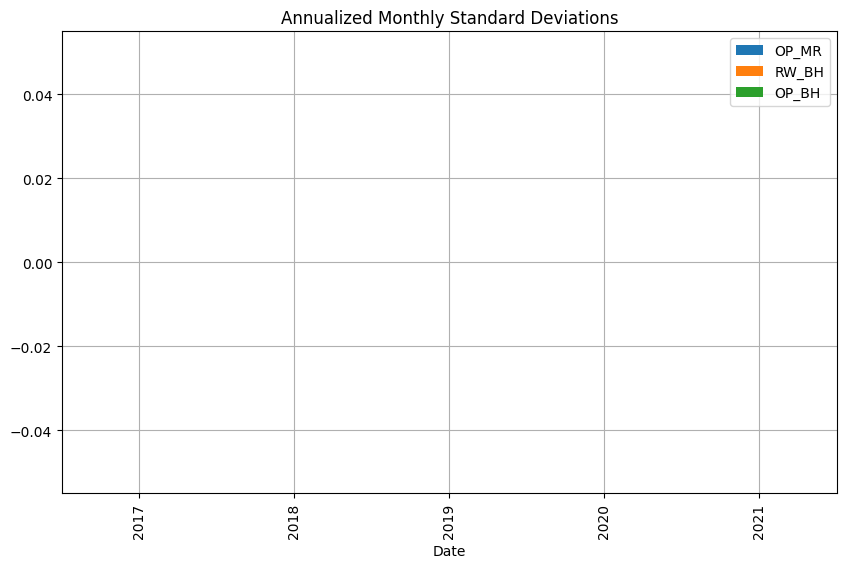

In [144]:
# Reformat index as datetime object
portfolios.index = pd.to_datetime(portfolios.index)

# Calculate annualized monthly standard deviations
annualized_std = portfolios.groupby(portfolios.index.year).std() * np.sqrt(12)

# Create the bar plot
ax = annualized_std.plot(kind='bar', figsize=(10, 6), grid=True, title="Annualized Monthly Standard Deviations")
plt.show()


<!-- END QUESTION -->

---

#### 18. Which of the three portfolios was the best performer over the entire sample period? What was its' cumulative (total) return over the entire sample period? Store the two values in two variables called `port18` and `ret18`, respectively.

_Points:_ 5

In [137]:
cumulative_returns_port = (portfolios + 1).cumprod(axis=0).iloc[-1, :]
port18 = cumulative_returns_port.idxmax()
ret18 = cumulative_returns_port.max()

In [138]:
grader.check("q18")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q18 results: All test cases passed!

---

#### 19. Which of the four portfolios had the highest Sharpe ratio over the entire sample period? What was its Sharpe Ratio? Store the two values in two variables called `port19` and `sr19`, respectively. (Hint: Use the already created `ff_factors` DataFrame from Part 1 to answer this question).

_Points:_ 5

In [139]:
def calculate_sharpe_ratio(portfolio_returns, rf_rate):
    portfolio_returns = portfolio_returns.dropna()
    excess_returns = portfolio_returns - rf_rate['RF']
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

sharpe_ratios = portfolios.apply(calculate_sharpe_ratio, args=(rf_rate,))
port19 = sharpe_ratios.idxmax()
sr19 = sharpe_ratios.max()


In [140]:
grader.check("q19")

/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


q19 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 20. Run the Fama-French 4 factor model for the portfolio with the highest Sharpe ratio and print the output of the regression. Did the portfolio outperform or underperform? Briefly explain.(Hint: Use the already created `ff_factors` DataFrame from Part 1 to answer this question).

_Points:_ 5

In [141]:
import statsmodels.api as sm

# Prepare the Fama-French factors and the portfolio returns
highest_sr_port_returns = portfolios[port19].dropna()

# Merge the Fama-French factors with the portfolio returns
merged_data = pd.merge(highest_sr_port_returns, ff_factors, left_index=True, right_index=True)
excess_returns = merged_data[port19] - merged_data['RF']

# Run the regression
X = sm.add_constant(merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom   ']])
y = excess_returns
model = sm.OLS(y, X).fit()
print(model.summary())

# Determine outperformance or underperformance
alpha = model.params['const']
if alpha > 0:
    print("The portfolio outperformed.")
else:
    print("The portfolio underperformed.")


KeyError: nan

In [ ]:
# Brief Explanation

<!-- END QUESTION -->

---

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)



RuntimeError: b'/Users/chengyixu/Library/Python/3.10/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.\n  validate(nb)\n'